# Check `GDS` Python stack

This notebook checks all software requirements for the course Geographic Data Science are correctly installed. 

A successful run of the notebook implies no errors returned in any cell *and* every cell beyond the first one returning a printout of `True`. This ensures a correct environment installed.

In [1]:
import bokeh

In [2]:
import colorama

In [3]:
import contextily

In [4]:
import cython

In [5]:
import dask

In [6]:
import dask_ml

In [7]:
import datashader

In [8]:
import dill

In [9]:
import geopandas

In [10]:
import geopy

In [12]:
import six
import joblib
import hdbscan

In [13]:
import ipyleaflet

In [14]:
import ipyparallel

In [15]:
import ipywidgets

In [16]:
import mplleaflet

In [17]:
import nbdime

In [18]:
import networkx

In [19]:
import osmnx

In [20]:
import palettable

In [21]:
import pandana

In [22]:
import polyline

In [23]:
import pymc3

In [24]:
import pysal

In [25]:
import pystan

In [26]:
import qgrid

In [27]:
import rasterio

In [28]:
import rasterstats

In [29]:
import skimage

In [30]:
import sklearn

In [31]:
import seaborn

In [32]:
import statsmodels

In [33]:
import urbanaccess

In [34]:
import xlrd

In [35]:
import xlsxwriter

---

**Legacy checks** (in some ways superseded by those above but in some still useful)

In [36]:
import bokeh as bk
float(bk.__version__[:1]) >= 1

True

In [37]:
import matplotlib as mpl
float(mpl.__version__[:3]) >= 1.5

True

In [38]:
import mplleaflet as mpll

In [39]:
import seaborn as sns
float(sns.__version__[:3]) >= 0.6

True

In [40]:
import datashader as ds
float(ds.__version__[:3]) >= 0.6

True

In [41]:
import palettable as pltt
float(pltt.__version__[:3]) >= 3.1

True

In [42]:
sns.palplot(pltt.matplotlib.Viridis_10.hex_colors)

---

In [43]:
import pandas as pd
float(pd.__version__[:4]) >= 0.18

True

In [44]:
import dask
float(dask.__version__[:1]) >= 1

True

In [45]:
import sklearn
float(sklearn.__version__[:4]) >= 0.20

True

In [61]:
import statsmodels.api as sm
print(sm.__version__)
print(float(sm.__version__.split('.')[1]) >= 9)

0.10.1
True


In [54]:
import pymc3 as pm
print(pm.__version__)
print(float(pm.__version__[:3]) >= 3.6)

3.5
False


---

In [48]:
import fiona
float(fiona.__version__[:3]) >= 1.8

True

In [49]:
import geopandas as gpd
float(gpd.__version__[:3]) >= 0.4

True

In [50]:
import pysal as ps
float(ps.__version__[:1]) >= 2

True

In [51]:
import rasterio as rio
float(rio.__version__[:1]) >= 1

True

# Test

In [62]:
shp = pysal.lib.examples.get_path('columbus.shp')
db = geopandas.read_file(shp)
db.head()

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,...,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
0,0.309441,2.440629,2,5,1,5,80.467003,19.531,15.725980,2.850747,...,5.03,38.799999,44.070000,1.0,1.0,1.0,0.0,1000.0,1005.0,"POLYGON ((8.624129295349121 14.23698043823242,..."
1,0.259329,2.236939,3,1,2,1,44.567001,21.232,18.801754,5.296720,...,4.27,35.619999,42.380001,1.0,1.0,0.0,0.0,1000.0,1001.0,"POLYGON ((8.252790451049805 14.23694038391113,..."
2,0.192468,2.187547,4,6,3,6,26.350000,15.956,30.626781,4.534649,...,3.89,39.820000,41.180000,1.0,1.0,1.0,0.0,1000.0,1006.0,"POLYGON ((8.653305053710938 14.00809001922607,..."
3,0.083841,1.427635,5,2,4,2,33.200001,4.477,32.387760,0.394427,...,3.70,36.500000,40.520000,1.0,1.0,0.0,0.0,1000.0,1002.0,"POLYGON ((8.459499359130859 13.82034969329834,..."
4,0.488888,2.997133,6,7,5,7,23.225000,11.252,50.731510,0.405664,...,2.83,40.009998,38.000000,1.0,1.0,1.0,0.0,1000.0,1007.0,"POLYGON ((8.685274124145508 13.63951969146729,..."


In [63]:
db[['AREA', 'PERIMETER']].to_feather('db.feather')
tst = pd.read_feather('db.feather')
! rm db.feather

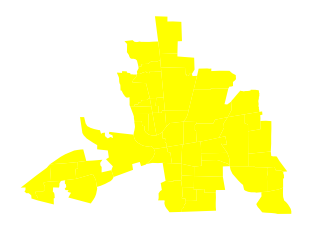

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(1)
db.plot(facecolor='yellow', ax=ax)
ax.set_axis_off()
plt.show()

In [65]:
db.crs['init'] = 'epsg:26918'

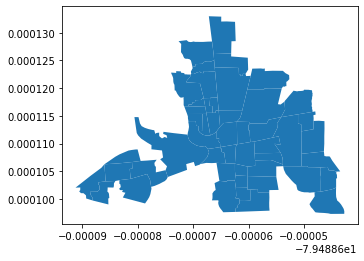

In [66]:
db_wgs84 = db.to_crs(epsg=4326)
db_wgs84.plot()
plt.show()

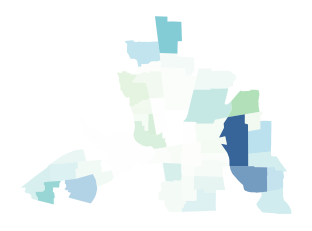

In [67]:
from pysal.viz.splot.mapping import vba_choropleth

f, ax = vba_choropleth(db['INC'], db['HOVAL'], db)

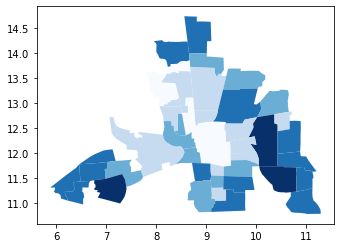

In [68]:
db.plot(column='INC', scheme='fisher_jenks', cmap=plt.matplotlib.cm.Blues)
plt.show()

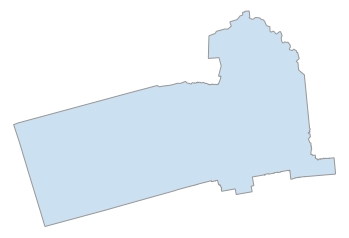

In [69]:
city = osmnx.gdf_from_place('Berkeley, California')
osmnx.plot_shape(osmnx.project_gdf(city));

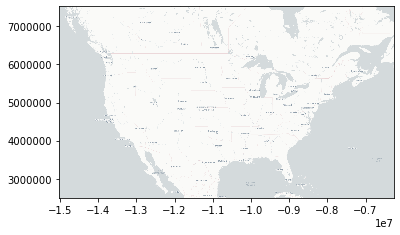

In [70]:
import numpy as np
import contextily as ctx
tl = ctx.providers.CartoDB.Positron

db = geopandas.read_file(ps.lib.examples.get_path('us48.shp'))
db.crs = {'init': 'epsg:4326'}
dbp = db.to_crs(epsg=3857)
w, s, e, n = dbp.total_bounds
# Download raster
_ = ctx.bounds2raster(w, s, e, n, 'us.tif', url=tl)
# Load up and plot
source = rio.open('us.tif', 'r')
red = source.read(1)
green = source.read(2)
blue = source.read(3)
pix = np.dstack((red, green, blue))
bounds = (source.bounds.left, source.bounds.right, \
          source.bounds.bottom, source.bounds.top)
f = plt.figure(figsize=(6, 6))
ax = plt.imshow(pix, extent=bounds)

! rm us.tif

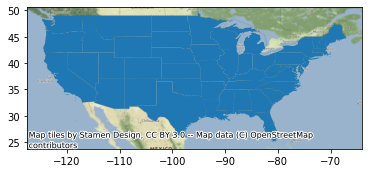

In [71]:
ax = db.plot()
ctx.add_basemap(ax, crs=db.crs)

In [72]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, SplitMapControl

m = Map(center=(42.6824, 365.581), zoom=5)

right_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2017-11-11")
left_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisAquaBands721CR, "2017-11-11")

control = SplitMapControl(left_layer=left_layer, right_layer=right_layer)
m.add_control(control)

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …